In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
ds=pd.read_csv('retail_dataset.csv')

In [5]:
items=(ds['0'].unique())

In [6]:
itemset=set(items)
encoded_values=[]

for index, row in ds.iterrows():
    rowset=set(row)
    labels={}

    uncommons=list(itemset-rowset)
    commons=list(itemset.intersection(rowset))

    for uc in uncommons:
        labels[uc]=0
    for com in commons:
        labels[com]=1
    encoded_values.append(labels)
encoded_values[0]

{'Bagel': 0,
 'Milk': 0,
 'Pencil': 1,
 'Diaper': 1,
 'Wine': 1,
 'Cheese': 1,
 'Meat': 1,
 'Eggs': 1,
 'Bread': 1}

In [7]:
b_data=pd.DataFrame(encoded_values)

In [8]:
import warnings
warnings.simplefilter('ignore')

In [9]:
freq_items=apriori(b_data,min_support=0.2,use_colnames=True,verbose=1)

Processing 4 combinations | Sampling itemset size 4 3


In [10]:
rules=association_rules(freq_items,metric='confidence',min_threshold=0.6)

In [11]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
5,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
6,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
8,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
9,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655


In [18]:
for i in range(14):
    print('Rules',rules.antecedents[i],'--->',rules.consequents[i])
    print('Support',rules.support[i])
    print("confidence:",rules.confidence[i])
    print('********************************************************')

Rules frozenset({'Bagel'}) ---> frozenset({'Bread'})
Support 0.27936507936507937
confidence: 0.6567164179104478
********************************************************
Rules frozenset({'Milk'}) ---> frozenset({'Cheese'})
Support 0.3047619047619048
confidence: 0.6075949367088608
********************************************************
Rules frozenset({'Cheese'}) ---> frozenset({'Milk'})
Support 0.3047619047619048
confidence: 0.6075949367088608
********************************************************
Rules frozenset({'Wine'}) ---> frozenset({'Cheese'})
Support 0.2698412698412698
confidence: 0.6159420289855072
********************************************************
Rules frozenset({'Meat'}) ---> frozenset({'Cheese'})
Support 0.3238095238095238
confidence: 0.68
********************************************************
Rules frozenset({'Cheese'}) ---> frozenset({'Meat'})
Support 0.3238095238095238
confidence: 0.6455696202531646
********************************************************
Rules

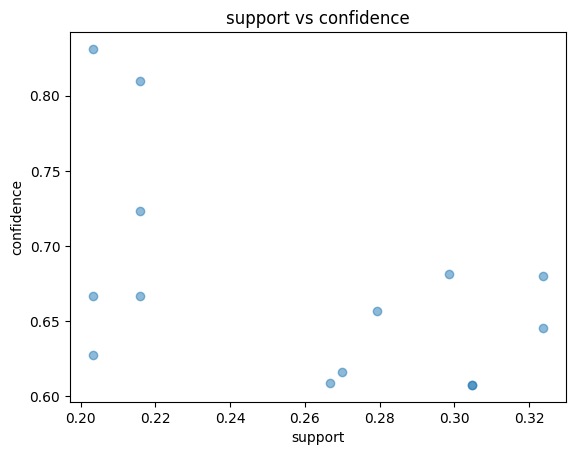

In [19]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

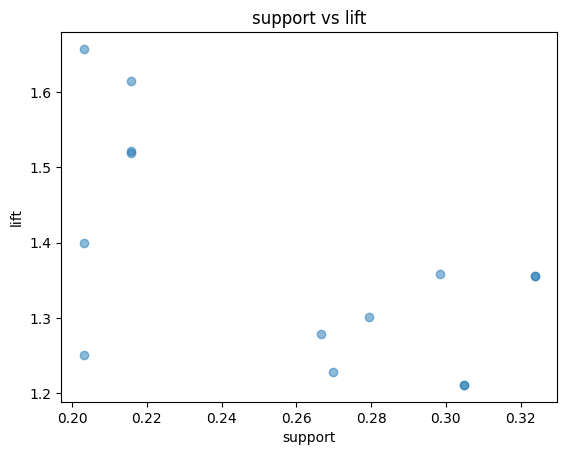

In [20]:
plt.scatter(rules['support'],rules['lift'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('support vs lift')
plt.show()

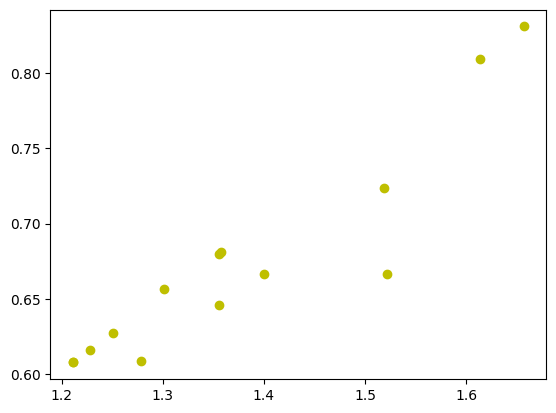

In [22]:
fit=np.polyfit(rules['confidence'],rules['lift'],1)
fir_fn=np.poly1d(fit)
plt.plot(rules['lift'],rules['confidence'],'yo',label='datapoint')
plt.show()